<a href="https://colab.research.google.com/github/JuanLara18/AlgorithmsUN2023I/blob/main/Lab2/jlara_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
%%capture
!pip install githubdl

In [141]:
%%capture
!githubdl -u https://github.com/ssanderson/pydata-toolbox -d demos -g 0260ccdcf10212d2a8f1d9ff6fbc7e55b00a4ad2

In [142]:
%%capture
pip install -U fortran-magic

In [4]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [5]:
%matplotlib inline
%reload_ext fortranmagic
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [6]:

avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-4-74fdf899ad9d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [7]:
assert ran_the_first_cell, "Oh noes!"

In [8]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [9]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [10]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [11]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [12]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [13]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [14]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [15]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [16]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [17]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [18]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [19]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [20]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [21]:
# No slicing.
philosophers['Bertrand'] # philosophers['Bertrand':'Immanuel']

'Russell'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


Begin

In [22]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [2, 3, 4, 5]]

**My own example 1: Correction of matrix multiplication**

In [23]:
def matmulpy(A, B):
    """Multiply matrix A by matrix B."""
    if len(B) != len(A[0]):
      return "It is not possible to multiply matrices"
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [24]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.3980127947118671, 0.820675781425214, 0.5453573676516877],
 [0.945635721527738, 0.738862879589604, 0.9172775959902224]]

In [25]:
%%time
#Python
matmulpy(a, b)

CPU times: user 84 µs, sys: 10 µs, total: 94 µs
Wall time: 116 µs


[[11, 17, 23, 29], [16, 25, 34, 43], [31, 49, 67, 85], [5, 8, 11, 14]]

In [26]:
%%time 
#En python
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmulpy(randa, randb)

CPU times: user 15.6 s, sys: 90.4 ms, total: 15.7 s
Wall time: 22.1 s


***Suppose we have some matrices for Pyhton, C, C++, Java, JavaScript, Fortran and Numpy***

**My own example 2 Information about processor**

In [27]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.148
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.29
clflush size	: 64
cache_alignment	: 64
addres

***Multiply matrix A by matrix B in Pyhton***

**My own example 3**

In [28]:
MyA = random_matrix(600, 100);
MyB = random_matrix(100, 600);

MyA2 = random_matrix(100, 100);
MyB2 = random_matrix(100, 100);

**My own example 4**

In [29]:
import pandas as pd

mydf = pd.DataFrame(columns = ['Language','Average(ms)'])
mydf.name = "Matrices 600x100"
mydf2 = pd.DataFrame(columns = ['Language','Average(ms)'])
mydf2.name = "Matrices 100x100"

**My own example 5**

In [30]:
#En python
%%time 
for i in range(0,10):
  matmulpy(MyA, MyB);

CPU times: user 1min 51s, sys: 307 ms, total: 1min 51s
Wall time: 1min 54s


**My own example 6**

In [31]:
#En python
%%time 
for i in range(0,10):
  matmulpy(MyA2, MyB2);

CPU times: user 2.4 s, sys: 4.04 ms, total: 2.4 s
Wall time: 2.41 s


**My own example 7**

In [32]:
mydf.loc[len(mydf.index)] = ['Python',910]
mydf2.loc[len(mydf.index)] = ['Python',23.9]


*   Matrices (600 x 100) The average time is 910 ms.
*   Matrices (100 x 100) The average time is 23.9 ms.

  ***Multiply matrix A by matrix B in Numpy***

**My own example 8**

In [33]:
MyA = np.array(MyA)
MyB = np.array(MyB)
MyA2 = np.array(MyA2)
MyB2 = np.array(MyB2)

**My own example 9**

In [34]:
# A by B in Numpy 
%%time
for i in range(0,10):
  np.matmul(MyA,MyB)

CPU times: user 52.3 ms, sys: 25.9 ms, total: 78.2 ms
Wall time: 73 ms


**My own example 10**

In [35]:
# A by B in Numpy 
%%time
for i in range(0,10):
  np.matmul(MyA2,MyB2)

CPU times: user 302 µs, sys: 4.65 ms, total: 4.96 ms
Wall time: 6.33 ms


**My own example 11**

In [36]:
mydf.loc[len(mydf.index)] = ['Numpy',24.3]
mydf2.loc[len(mydf.index)] = ['Numpy',3.7]


*   Matrices (600 x 100) The average time is 24.3 ms.
*   Matrices (100 x 100) The average time is 3.7 ms.

***Multiply matrix A by matrix B in fortran***

**My own example 12**

In [37]:
%%fortran

subroutine  fortran_matmul(A,B,N,M,L,O,R)  
  implicit none
  integer,intent(in) :: N,M,L,O   
  double precision, intent(in) :: A(600,*)
  double precision, intent(in) :: B(100,*)
  double precision, intent(out) :: R(N,O)
  integer I,J,K
  do K=1,N  
    do I=1,O
      R(K,I)=0    
      do J=1,L
       R(K,I) = R(K,I) + A(K,J)*B(J,I)
        
      end do
    end do
  end do   
end 

**My own example 13**

In [38]:
%%time
for i in range(0,10):
  fortran_matmul(MyA, MyB,600,100,100,600)

CPU times: user 448 ms, sys: 3.02 ms, total: 451 ms
Wall time: 509 ms


**My own example 14**

In [39]:
%%fortran

subroutine  fortran_matmul(A,B,N,M,L,O,R)  
  implicit none
  integer,intent(in) :: N,M,L,O   
  double precision, intent(in) :: A(100,*)
  double precision, intent(in) :: B(100,*)
  double precision, intent(out) :: R(N,O)
  integer I,J,K
  do K=1,N  
    do I=1,O
      R(K,I)=0    
      do J=1,L
       R(K,I) = R(K,I) + A(K,J)*B(J,I)
        
      end do
    end do
  end do   
end 

**My own example 15**

In [40]:
%%time
for i in range(0,10):
  fortran_matmul(MyA2, MyB2,100,100,100,100)

CPU times: user 11.5 ms, sys: 0 ns, total: 11.5 ms
Wall time: 12.2 ms


In [41]:
# %%writefile Myfortran.f #A[N][M] B[NN][MM]
#!gfortran Myfortran.f -o Myfortran
#!./Myfortran

**My own example 16**

In [42]:
mydf.loc[len(mydf.index)] = ['fortran',45.5]
mydf2.loc[len(mydf.index)] = ['fortran',1.73]

*   Matrices (600 x 100) The average time is 45.5 ms.
*   Matrices (100 x 100) The average time is 1.73 ms.

***Multiply matrix A by matrix B in C*** 

**My own example 17**

In [43]:
%%writefile main.c
#define _XOPEN_SOURCE    /* ALWAYS BEFORE the include statement */
#include <stdlib.h>
#include <stdbool.h>
#include <stdio.h>
#include <time.h>
#include <unistd.h> 

#define rows 600 //100 // 600
#define cols 100 //100

double A [rows][cols]; // 600*100
double B [cols][rows]; // 100*100

double result[rows][rows];//600*100

bool C_AbyB(int n1, int m1, int n2, int m2){ //A[n1][m1] B[n2][m2]
    
    if(m1 != n2) return false;
    
    //Multiplicación de Matrices A * B
    for (int k = 0; k < n1; k++) {
        for (int i = 0; i < m2; i++) {
            double suma = 0.0;
            for (int j = 0; j < n2; j++) {
                
                suma += A[k][j] * B[j][i];
            }
            result[k][i] = suma;
        }
    }
    
    
    /* // Imprime la matriz resultado
    printf("\n");
    for (int i = 0; i < n1; i++) {
        for (int j = 0; j < m2; j++) {
            printf("%.2f \t", result[i][j]);
        }
        printf("\n");
    }
    */
    
    return true;
}

void llenarM(){
    //printf("\n");
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            A[i][j] = drand48(); // srand48(time(0));
            //printf("%.5f \t", A[i][j]);
        }
        //printf("\n");
    }
    
    //printf("\n");
    for (int i = 0; i < cols; i++) {
        for (int j = 0; j < rows; j++) {
            B[i][j] = drand48(); // srand48(time(0));
            //printf("%.5f \t", B[i][j]);
        }
        //printf("\n");
    }
}

double timeTotal(){
    llenarM();  
   
    clock_t begin = clock();
    
    C_AbyB(rows, cols, cols, rows);
    
    clock_t end = clock();
    return (double)(end - begin) / CLOCKS_PER_SEC;
}

int main()
{
    double time_spent = 0.0;
    for(int i=1; i<=10; i++){
        time_spent += timeTotal();
    }
    time_spent /= 10.0;
    printf("The average time is %f seconds \n", time_spent);
    
    return 0;
}


Writing main.c


**My own example 18**

In [44]:
#%%time
!gcc main.c -o mainc
!./mainc

The average time is 0.136228 seconds 


**My own example 19**

In [45]:
mydf.loc[len(mydf.index)] = ['C',135.322]
mydf2.loc[len(mydf.index)] = ['C',4.842]



*   Matrices (600 x 100) The average time is 135.322 ms.
*   Matrices (100 x 100) The average time is 4.842 ms.




***Multiply matrix A by matrix B in C++***

**My own example 20**

In [46]:
%%writefile main.cpp
#include <iostream>
#include <random>
#include <time.h>
#include <unistd.h> 

using namespace std;

const int rows = 100; // 100 // 600
const int cols = 100; // 100

double A [rows][cols]; // 600*100
double B [cols][rows]; // 100*600

double result[rows][rows];//600*600 //100*100

/*
double A[3][3] = {
            {3, 2, 1},
            {1, 1, 3},
            {0, 2, 1},
    };
double B[3][2] = {
            {2, 1},
            {1, 0},
            {3, 2},
    };
*/
bool C_AbyB(int n1, int m1, int n2, int m2){ //A[n1][m1] B[n2][m2]
    
    if(m1 != n2) return false;
    
    //Multiplicación de Matrices A * B
    for (int k = 0; k < n1; k++) {
        for (int i = 0; i < m2; i++) {
            double suma = 0.0;
            for (int j = 0; j < n2; j++) {
                
                suma += A[k][j] * B[j][i];
            }
            result[k][i] = suma;
        }
    }
    
    
    /* // Imprime la matriz resultado
    printf("\n");
    for (int i = 0; i < n1; i++) {
        for (int j = 0; j < m2; j++) {
            printf("%.2f \t", result[i][j]);
        }
        printf("\n");
    }
    */
    
    return true;
}

void llenarM(){
    //Generar el numero aleatorio
    random_device rd;
    default_random_engine eng(rd());
    uniform_real_distribution<> distr(0, 1);

    //printf("\n");
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            A[i][j] = distr(eng);
            //printf("%.5f \t", A[i][j]);
        }
        //printf("\n");
    }
    
    //printf("\n");
    for (int i = 0; i < cols; i++) {
        for (int j = 0; j < rows; j++) {
            B[i][j] = distr(eng);
            //printf("%.5f \t", B[i][j]);
        }
        //printf("\n");
    }
}

double timeTotal(){
    llenarM();  
    //C_AbyB(3,3,3,2);
    
    clock_t begin = clock();
    
    C_AbyB(rows, cols, cols, rows);
    
    clock_t end = clock();
    return (double)(end - begin) / CLOCKS_PER_SEC;
}

int main()
{
    double time_spent = 0.0;
    for(int i=1; i<=10; i++){
        time_spent += timeTotal();
    }
    time_spent /= 10.0;
    printf("The average time is %f seconds", time_spent);
    
    return 0;
}


Writing main.cpp


**My own example 21**

In [47]:
#%%time
!g++ main.cpp -o maincpp
!./maincpp

The average time is 0.003954 seconds

**My own example 22**

In [48]:
mydf.loc[len(mydf.index)] = ['C++',135.691]
mydf2.loc[len(mydf.index)] = ['C++',3.791]

*   Matrices (600 x 100) The average time is 135.691 ms.
*   Matrices (100 x 100) The average time is 3.791 ms.

**Multiply matrix A by matrix B in JavaScript**

**My own example 23**

In [49]:
%%writefile javascript.js
function CreateArray(rows, cols) {

    const x = new Array(rows);

    for (var i = 0; i < x.length; i++) {
        x[i] = new Array(cols);
    }
    
    
    for(let i  = 0 ; i < x.length; i++){
        for(let j = 0; j < x[0].length; j++){
            x[i][j] = Math.random()
        }
    }

    return x;
}

function matmul(A, B){
    if (B.length != A[0].length){
        return "It is not possible to multiply matrices";
    }
      
    rows_out = A.length
    cols_out = B[0].length
    out = CreateArray(rows_out, cols_out)
    
    for (let i = 0; i < rows_out; i++){
        for (let j = 0; j <cols_out; j++){
            for(let k = 0; k < B.length; k++ ){
                out[i][j] += A[i][k] * B[k][j]
            }
        } 
    }
            
    return out
}

const a = CreateArray(600, 100)
const b = CreateArray(100, 600)

const tiempo = []

for(let i = 0; i< 10; i++){
    var start = +new Date();

    const x = matmul(a,b)

    var end = +new Date();
    tiempo.push(end - start)
}
console.log("Tiempo en ms 600x100 * 100x600 ")
console.log(tiempo.reduce((accumulator, curr) => accumulator + curr) / 10);

const c = CreateArray(100, 100)
const d = CreateArray(100, 100)

tiempo.length = 0

for(let i = 0; i< 10; i++){
    var start = +new Date();

    const x = matmul(c,d)

    var end = +new Date();
    tiempo.push(end - start)
}
console.log("Tiempo en ms 100x100 * 100x100 ")
console.log(tiempo.reduce((accumulator, curr) => accumulator + curr) / 10);

Writing javascript.js


**My own example 24**

In [50]:
!node javascript.js

Tiempo en ms 600x100 * 100x600 
227.9
Tiempo en ms 100x100 * 100x100 
6.6


**My own example 25**

In [51]:
mydf.loc[len(mydf.index)] = ['JavaScript',227.8]
mydf2.loc[len(mydf.index)] = ['JavaScript',6.7]

*   Matrices (600 x 100) The average time is 227.8 ms.
*   Matrices (100 x 100) The average time is 6.7 ms.

***Multiply matrix A by matrix B in Java***

**My own example 26**

In [52]:
%%writefile Main.java
public class Main {
    
    public static double[][] crearMatriz(int rows, int cols){
        
        double arr[][] = new double[rows][cols];
        
        for(int i  = 0 ; i < rows; i++){
            for(int j = 0; j < cols; j++){
                arr[i][j] = Math.random();
            }
        }
    
        return arr;
        
    }
    
    public static double[][] matmul(double[][] A, double[][] B){
        if (B.length != A[0].length){
            
            System.out.println("No se puede hacer esta operacion");
            double[][] na = {{0.0}};
            return na;
        }
          
        int rows_out = A.length;
        int cols_out = B[0].length;
        double out[][] = crearMatriz(rows_out, cols_out);
        
        for (int i = 0; i < rows_out; i++){
            for (int j = 0; j <cols_out; j++){
                for(int k = 0; k < B.length; k++ ){
                    out[i][j] += A[i][k] * B[k][j];
                }
            } 
        }
                
        return out;
    }
    
    
    public static void main(String args[]) {
        double[][] a = crearMatriz(600, 100);
        double[][] b = crearMatriz(100, 600);
        
        double tiempo = 0.0;
        
        for(int i = 0; i< 10; i++){
            long inicio = System.currentTimeMillis();
        
            double[][] x = matmul(a,b);
        
            long fin = System.currentTimeMillis();
            
            tiempo += (fin - inicio);
        }
        
        System.out.println("Tiempo en ms 600x100 * 100x600 ");
        System.out.println(tiempo/10);
        
        double[][] c = crearMatriz(100, 100);
        double[][] d = crearMatriz(100, 100);
        
        tiempo = 0.0;
        
        for(int i = 0; i< 10; i++){
            long inicio = System.currentTimeMillis();
        
            double[][] x = matmul(c,d);
        
            long fin = System.currentTimeMillis();
            
            tiempo += (fin - inicio);
        }
        System.out.println("Tiempo en ms 100x100 * 100x100");
        System.out.println(tiempo/10);

        
    }
}

Writing Main.java


**My own example 27**

In [53]:
!javac Main.java
!java Main

Tiempo en ms 600x100 * 100x600 
78.6
Tiempo en ms 100x100 * 100x100
1.9


**My own example 28**

In [54]:
mydf.loc[len(mydf.index)] = ['Java',79.1]
mydf2.loc[len(mydf.index)] = ['Java',2.2]

*   Matrices (600 x 100) The average time is 79.1 ms.
*   Matrices (100 x 100) The average time is 2.2 ms.

***Average time table***

**My own example 29**

In [55]:
max_time = mydf['Average(ms)'].max()
mydf['Speed factor'] = (max_time/mydf['Average(ms)']).astype(int)
mydf.sort_values(by=['Speed factor'], inplace=True, ascending=False)
mydf

,Language,Average(ms),Speed factor
1,Numpy,24.3,37
2,fortran,45.5,20
6,Java,79.1,11
3,C,135.322,6
4,C++,135.691,6
5,JavaScript,227.8,3
0,Python,910,1


**My own example 30**

In [56]:
max_time2 = mydf2['Average(ms)'].max()
mydf2['Speed factor'] = (max_time2/mydf2['Average(ms)']).astype(int)
mydf2.sort_values(by=['Speed factor'], inplace=True, ascending=False)
mydf2

,Language,Average(ms),Speed factor
3,fortran,1.730,13
7,Java,2.200,10
2,Numpy,3.700,6
5,C++,3.791,6
4,C,4.842,4
6,JavaScript,6.700,3
1,Python,23.900,1


It follows that the fastest language are Numpy and Fortran and the slowest are Python and JavaScript

***END***

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [57]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [58]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [59]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [60]:
Mylist_data = [float(i) for i in range(50000)]
Myarray_data = np.array(Mylist_data)

In [61]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 78.4 ms, sys: 5 µs, total: 78.4 ms
Wall time: 92.2 ms


333328333350000.0

In [62]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 203 µs, sys: 0 ns, total: 203 µs
Wall time: 209 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [63]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [64]:
# Interpretation overhead.
import py_compile
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


**My own example 31**

In [65]:
# Interpretation overhead.
import py_compile
Mysource_code = 'a + c / 2'
Mybytecode = compile(Mysource_code, '', 'exec')
import dis; dis.dis(Mybytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (c)
              4 LOAD_CONST               0 (2)
              6 BINARY_TRUE_DIVIDE
              8 BINARY_ADD
             10 POP_TOP
             12 LOAD_CONST               1 (None)
             14 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [66]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [67]:
data + data

array([2, 4, 6, 8])

In [68]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 591 µs, sys: 0 ns, total: 591 µs
Wall time: 603 µs


333328333350000.0

In [69]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.06 ms, sys: 990 µs, total: 2.05 ms
Wall time: 1.88 ms


333328333350000.0

In [70]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 471 µs, total: 471 µs
Wall time: 248 µs


333328333350000.0

***End***

In [71]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo" # Showing error

ValueError: ignored

In [72]:
# We also can't grow an array once it's created.
data.append(3) #showing the error

AttributeError: ignored

In [73]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [74]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [75]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [76]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [77]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [78]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [79]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [80]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [81]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [82]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [83]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [84]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [85]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [86]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [87]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [88]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [89]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [90]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [91]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [92]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [93]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [94]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [95]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [96]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [97]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [98]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [99]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [100]:
variance(np.random.standard_normal(1000))

1.0101245332931885

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [101]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [102]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [103]:
data.mean()

14.5

In [104]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [105]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [106]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [107]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [108]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [109]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [110]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [111]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [112]:
# ... or by label.
s.loc['a']

1

In [113]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [114]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [115]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [116]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [117]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [118]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [119]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [120]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [121]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [122]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

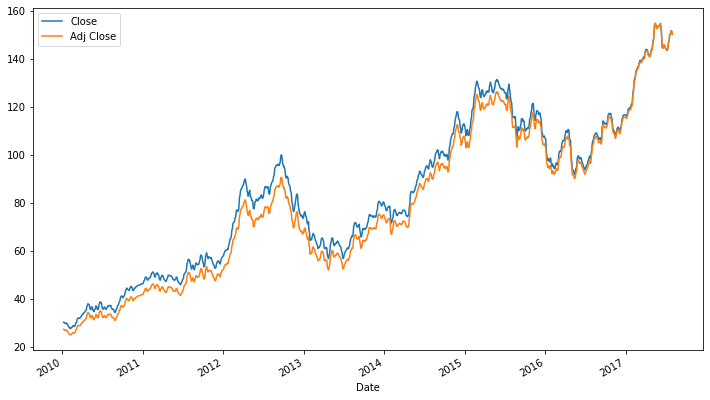

In [123]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

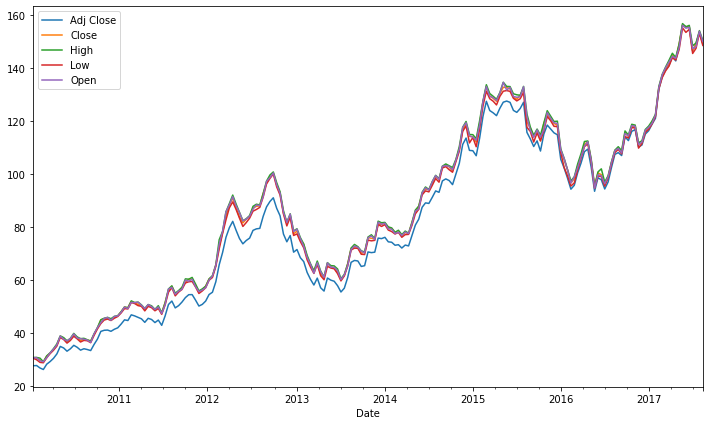

In [124]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

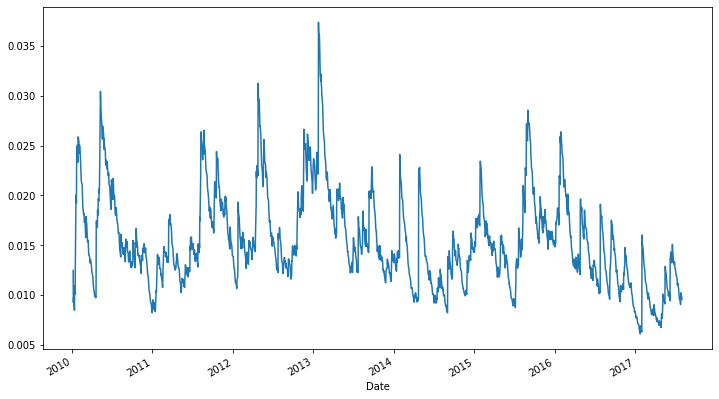

In [125]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [126]:
#from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-4-74fdf899ad9d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [127]:
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

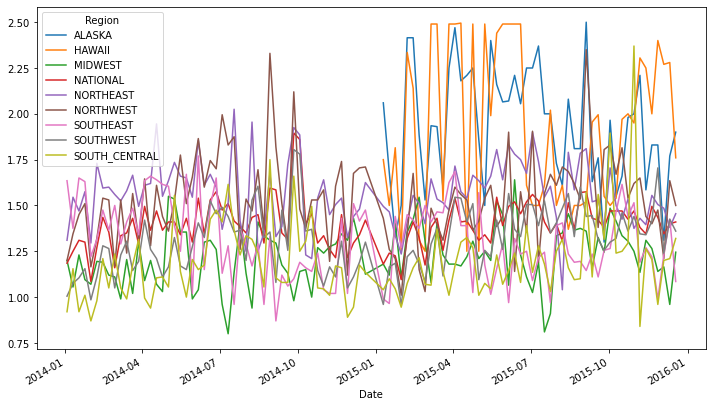

In [128]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [129]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

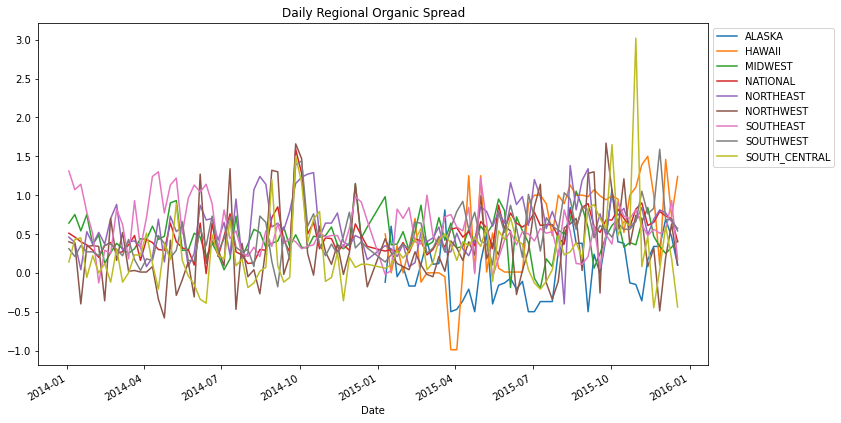

In [130]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [131]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


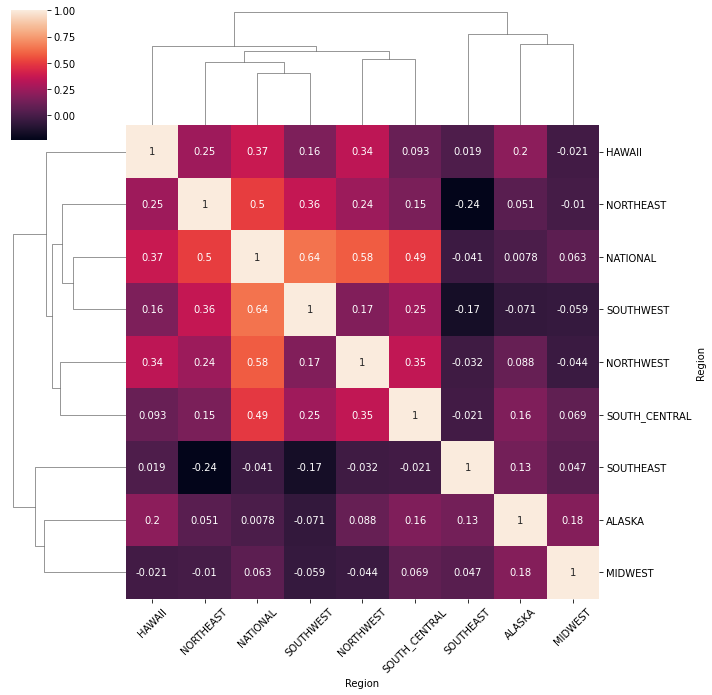

In [132]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Changing avocados function

# **My own Example code for official government data**
**Data from:** [datos.gov](https://www.datos.gov.co/Transporte/Probabilidad-de-accidentalidad/fz2j-qt75)

**For queries:** [API](https://www.datos.gov.co/resource/rs3u-8r4q.json) 

We will be utilizing official government data pertaining to the probability of mortality in accidents. This shall provide insight into determining the average number of fatalities resulting from incidents on the road, specifically in Cali.

**My own Example 32**

In [133]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd

def read_function(cache_loc='probability.html'):
  rows = requests.get(
      "https://www.datos.gov.co/resource/rs3u-8r4q.json", 
      
  )
  return pd.DataFrame.from_records(rows.json())

Firstly, we have to read data calling the function above here and then show it in a table.

**My own Example 33**

In [134]:
data = read_function()
data.head()

,id_mt,entidad,gizscore,fallecidos,gipvalue,tramo,nombre,latitud,longitud,pr,municipio,departamento,divipola
0,4G013,ANI,1.771262,11,0.076517,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.452987,-74.046677,10,CHIPAQUE,CUNDINAMARCA,25178
1,4G013,ANI,3.818008,23,0.000135,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.228251,-73.818342,58,GUAYABETAL,CUNDINAMARCA,25335
2,4G013,ANI,2.796662,1,0.005163,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.203601,-73.807188,60,GUAYABETAL,CUNDINAMARCA,25335
3,4G013,ANI,1.725132,1,0.084504,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.121453,-73.643971,85,VILLAVICENCIO,META,50001
4,<Null>,INVIAS-OTROS,1.725132,13,0.084504,Granada - Villavicencio,NaN,4.115757,-73.647497,sd,VILLAVICENCIO,META,50001


**My own Example 34**

In [135]:
data = read_function()
data.head()

,id_mt,entidad,gizscore,fallecidos,gipvalue,tramo,nombre,latitud,longitud,pr,municipio,departamento,divipola
0,4G013,ANI,1.771262,11,0.076517,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.452987,-74.046677,10,CHIPAQUE,CUNDINAMARCA,25178
1,4G013,ANI,3.818008,23,0.000135,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.228251,-73.818342,58,GUAYABETAL,CUNDINAMARCA,25335
2,4G013,ANI,2.796662,1,0.005163,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.203601,-73.807188,60,GUAYABETAL,CUNDINAMARCA,25335
3,4G013,ANI,1.725132,1,0.084504,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.121453,-73.643971,85,VILLAVICENCIO,META,50001
4,<Null>,INVIAS-OTROS,1.725132,13,0.084504,Granada - Villavicencio,NaN,4.115757,-73.647497,sd,VILLAVICENCIO,META,50001


**My own Example 35**

In [136]:
data.dtypes

id_mt           object
entidad         object
gizscore        object
fallecidos      object
gipvalue        object
tramo           object
nombre          object
latitud         object
longitud        object
pr              object
municipio       object
departamento    object
divipola        object
dtype: object

**My own Example 36** It's better wether variables are casted from object to a specific type.


In [137]:
data['gizscore'] = pd.to_numeric(data['gizscore'])
data['fallecidos'] = pd.to_numeric(data['fallecidos'])

print(data.dtypes)

id_mt            object
entidad          object
gizscore        float64
fallecidos        int64
gipvalue         object
tramo            object
nombre           object
latitud          object
longitud         object
pr               object
municipio        object
departamento     object
divipola         object
dtype: object


**My own Example 37**

In this instance, we applied a filter to the table based on the number of fatalities resulting from road incidents. It is widely acknowledged that the mean() function can be utilized to retrieve information from a particular column. Through the use of the groupby() function, we were able to determine the total number of fatalities for each "municipio" and ascertain the maximum value, which represents the most hazardous "municipio" due to its *xx* percent higher likelihood of fatalities.

In [143]:
dataInfo= data[data.municipio=="CALI"]
dataInfo2 = data['fallecidos']
data.mean()
data.groupby(['municipio']).mean()

<ipython-input-143-660900022b50>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


,gizscore,fallecidos
municipio,,
ACACÍAS,4.179201,17.000000
AGUACHICA,4.771095,19.000000
ALGARROBO,2.403517,11.000000
ALVARADO,1.811623,9.000000
ANDALUCÍA,4.771095,19.000000
...,...,...
VILLAVICENCIO,2.529799,9.666667
VILLETA,3.964667,12.000000
YUMBO,3.509068,8.428571


**My own Example 38**
We should see how data can be seen on a graphic which show the information above.

<bound method Axes.bar of <AxesSubplot:xlabel='Municipio'>>

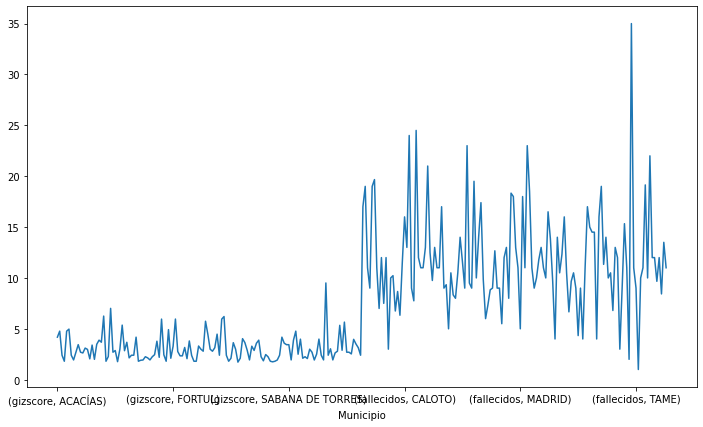

In [145]:
data.groupby(['municipio']).mean().unstack().ffill().plot(xlabel = "Municipio").bar

**Interpretation:**

Based on graphical evidence, it is apparent that the municipalities of Caloro, Madrid, and Tame exhibit a higher mortality rate in traffic accidents. These municipalities have a greater population and vehicular traffic compared to municipalities such as Acacías and Sabana de Torres. Therefore, we can conclude that there exists a positive correlation between population density, vehicular traffic, and the likelihood of fatalities resulting from road accidents, as corroborated by statistical data available from reputable sources such as the World Health Organization (WHO) and the National Highway Traffic Safety Administration (NHTSA).